### Libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
file = "./NetflixOriginals.csv"
df = pd.read_csv(file,encoding='ISO-8859-1')

### 1-In which language were the long-running films created according to the dataset? Visualization.

Language
English/Akan                  136.000000
Khmer/English/French          136.000000
Marathi                       121.666667
English/Korean                121.000000
Spanish/Catalan               116.000000
Korean                        115.833333
Hindi                         115.787879
English/Arabic                114.000000
Indonesian                    103.777778
Turkish                       101.800000
Malay                         101.000000
Tamil                         101.000000
Thai                          101.000000
Dutch                          99.666667
German                         99.600000
Filipino                       99.500000
Japanese                       99.333333
Polish                         98.666667
Italian                        98.357143
Spanish/English                96.000000
Spanish                        93.387097
French                         92.700000
English                        91.817955
Portuguese                     91.250000
English

Text(0, 0.5, 'Language')

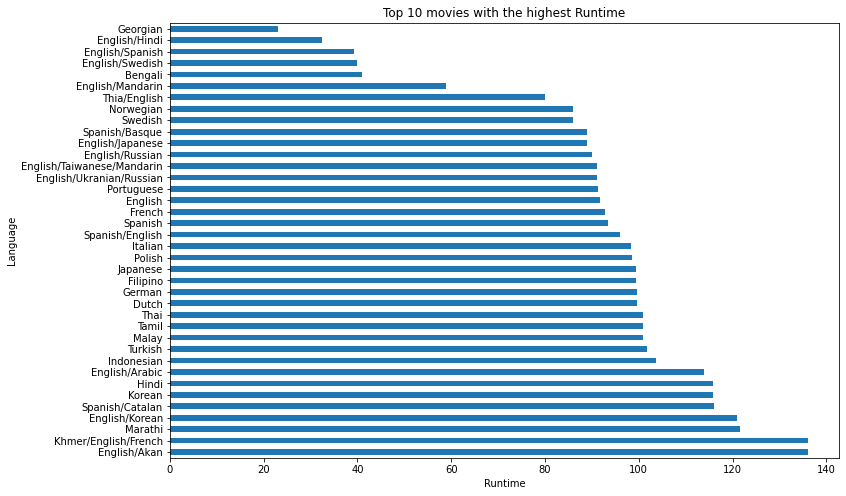

In [7]:
runtimes = df.sort_values("Runtime", ascending=False)
avg_runtime_list = runtimes.mean(numeric_only=True)
pd.set_option('display.max_rows', runtimes.shape[0] + 1)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

languages = runtimes.get("Language")

avg_runtime = avg_runtime_list["Runtime"]

# print(df.groupby("Language")["Runtime"].mean().head(10))
result = df.groupby("Language").mean().sort_values("Runtime", ascending=False)[
    "Runtime"]
print(result)
result.plot.barh(x="Language", y="Runtime", figsize=(12, 8), title="Top 10 movies with the highest Runtime",
                 legend=False)
plt.xlabel("Runtime")
plt.ylabel("Language")

### 2-Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.

c:\Users\yenes\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '30/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


Text(0, 0.5, 'IMDB Score')

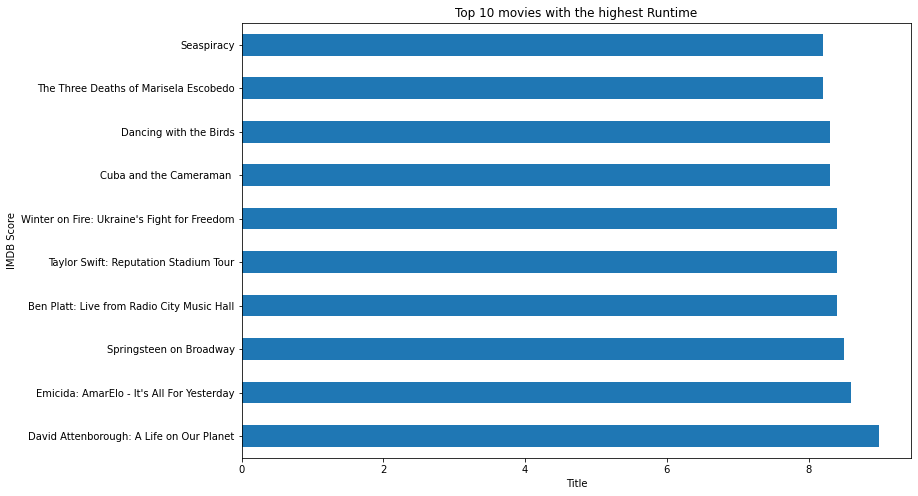

In [3]:
documentary = df[df['Genre'] == "Documentary"]

df['date'] = pd.to_datetime(documentary['Premiere'])

data = df[(df['date'] >= '01/01/2019') & (df['date'] <= '30/06/2020')]

result = df.groupby("Title").mean().sort_values("IMDB Score", ascending=False)[
    "IMDB Score"].head(10)

result.plot.barh(x="Title", y="IMDB Score", figsize=(12, 8), title="Top 10 movies with the highest Runtime",
                 legend=False)
plt.xlabel("Title")
plt.ylabel("IMDB Score")

### 3-Which genre has the highest IMDB rating among movies shot in English?

In [4]:
a = df[df['Language'] == "English"]


result = df.groupby("Genre").mean().sort_values("IMDB Score", ascending=False)[
    "IMDB Score"]

print(result[0:1])


Genre
Animation/Christmas/Comedy/Adventure    8.2
Name: IMDB Score, dtype: float64


### 4-What is the average 'runtime' of movies shot in 'Hindi'?

In [10]:
hindi_runtime_mean = df[df["Language"] == "Hindi"]["Runtime"].mean()
print(hindi_runtime_mean)

115.78787878787878


### 5-How many categories does the 'Genre' Column have and what are those categories? Express it visually.

In [11]:
len(df["Genre"].value_counts())
for genre in df["Genre"].unique():
    print(genre)

Documentary
Thriller
Science fiction/Drama
Horror thriller
Mystery
Action
Comedy
Heist film/Thriller
Musical/Western/Fantasy
Drama
Romantic comedy
Action comedy
Horror anthology
Political thriller
Superhero-Comedy
Horror
Romance drama
Anime / Short
Superhero
Heist
Western
Animation/Superhero
Family film
Action-thriller
Teen comedy-drama
Romantic drama
Animation
Aftershow / Interview
Christmas musical
Science fiction adventure
Science fiction
Variety show
Comedy-drama
Comedy/Fantasy/Family
Supernatural drama
Action/Comedy
Action/Science fiction
Romantic teenage drama
Comedy / Musical
Musical
Science fiction/Mystery
Crime drama
Psychological thriller drama
Adventure/Comedy
Black comedy
Romance
Horror comedy
Christian musical
Romantic teen drama
Family
Dark comedy
Comedy horror
Psychological thriller
Biopic
Science fiction/Thriller
Mockumentary
Satire
One-man show
Romantic comedy-drama
Comedy/Horror
Fantasy
Sports-drama
Zombie/Heist
Psychological horror
Sports film
Comedy mystery
Romantic

### 6-Find the 3 most used languages in the movies in the data set.

In [12]:
number_of_films_based_on_language = df["Language"].value_counts().head(3)
for lang,num in number_of_films_based_on_language.items():
    print(f"Language:{lang}, number of films:{num}")

Language:English, number of films:401
Language:Hindi, number of films:33
Language:Spanish, number of films:31


### 7-What are the top 10 movies with the highest IMDB rating?

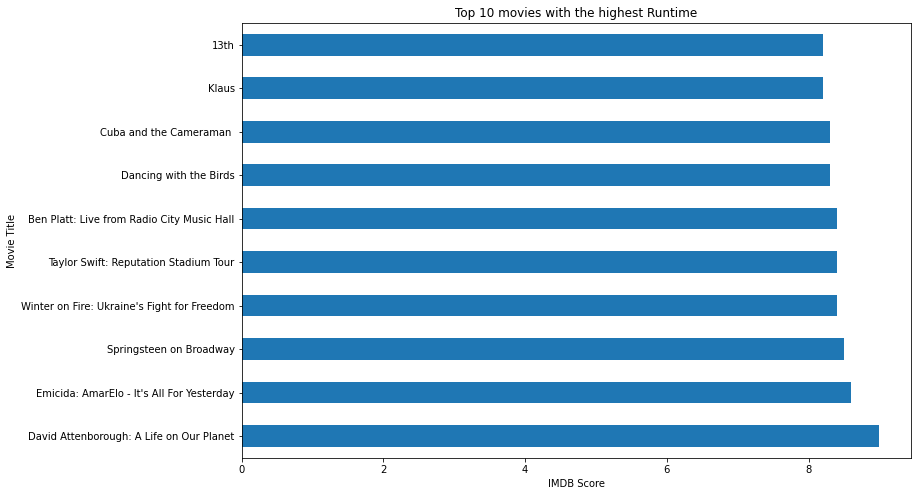

In [13]:
top_10 = df.sort_values("IMDB Score",ascending = False)[:10]
top_10.plot.barh(x="Title", y="IMDB Score", figsize=(12,8), title = "Top 10 movies with the highest Runtime", legend=False);
plt.xlabel("IMDB Score");
plt.ylabel("Movie Title");

### 8-What is the correlation between IMDB score and 'Runtime'? Examine and visualize.

<AxesSubplot:xlabel='Runtime', ylabel='IMDB Score'>

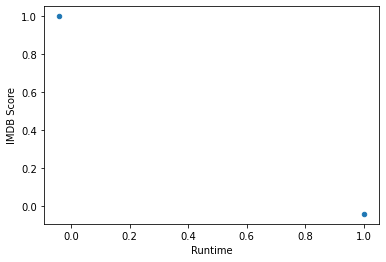

In [14]:
correlation = df[["Runtime","IMDB Score"]].corr()
correlation.plot.scatter(x="Runtime",y="IMDB Score")

### 9-Which are the top 10 'Genre' with the highest IMDB Score? Visualize it.

In [16]:
highest_imdb = df.sort_values("IMDB Score", ascending=False).head(10)
highest_imdb

,Title,Genre,Premiere,Runtime,IMDB Score,Language,P_Year
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019
571,13th,Documentary,"October 7, 2016",100,8.2,English,2016


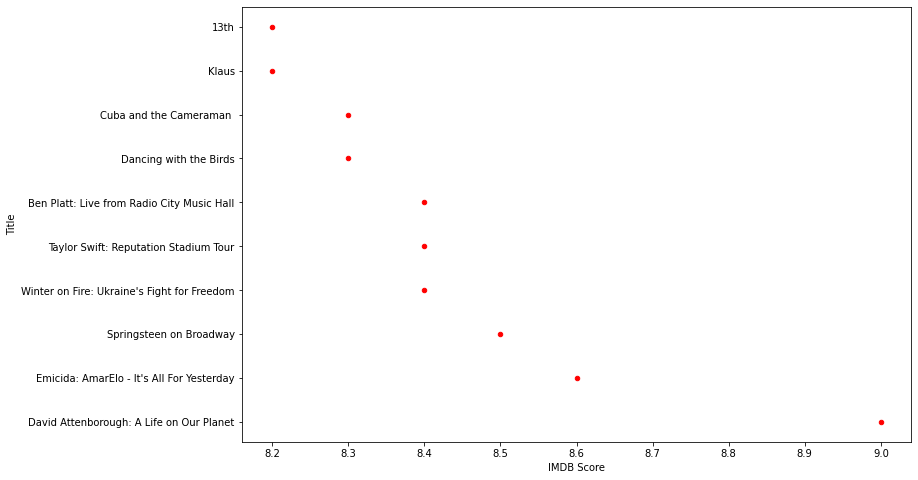

In [21]:
highest_imdb.plot.scatter(x="IMDB Score", y="Title", figsize=(12,8) ,c="r");

### 10-'What are the top 10 movies with the highest "Runtime"? Visualize.

In [6]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [7]:
max_runtime = df.sort_values("Runtime",ascending=False).head(10)
max_runtime 

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
247,Citation,Drama,"November 6, 2020",151,6.2,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English
5,Drive,Action,"November 1, 2019",147,3.5,Hindi


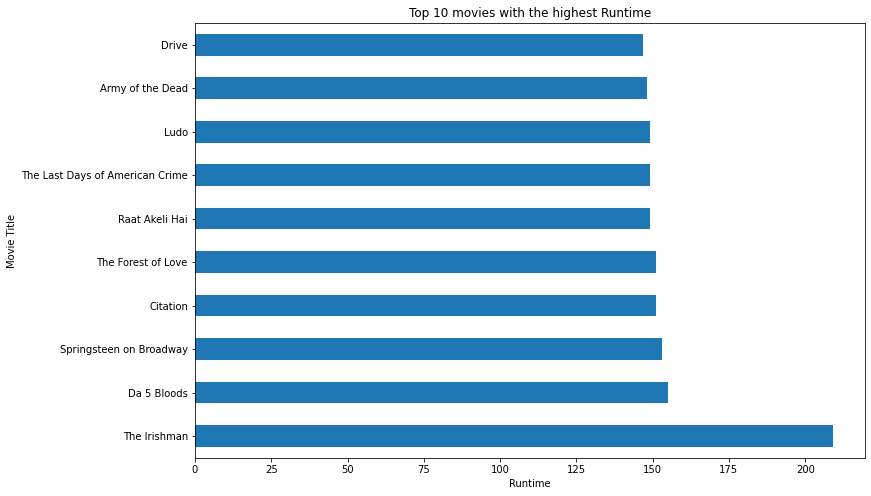

In [8]:
max_runtime.plot.barh(x="Title", y="Runtime", figsize=(12,8), title = "Top 10 movies with the highest Runtime", legend=False);
plt.xlabel("Runtime");
plt.ylabel("Movie Title");

### 11- In which year was the most movies released? Visualize it.

In [15]:
df["P_Year"] = df["Premiere"].str[-4:]
df["P_Year"] = df["P_Year"].astype("int32")

df.P_Year.unique()
year_of_max_film = df.P_Year.value_counts().sort_values(ascending=False)

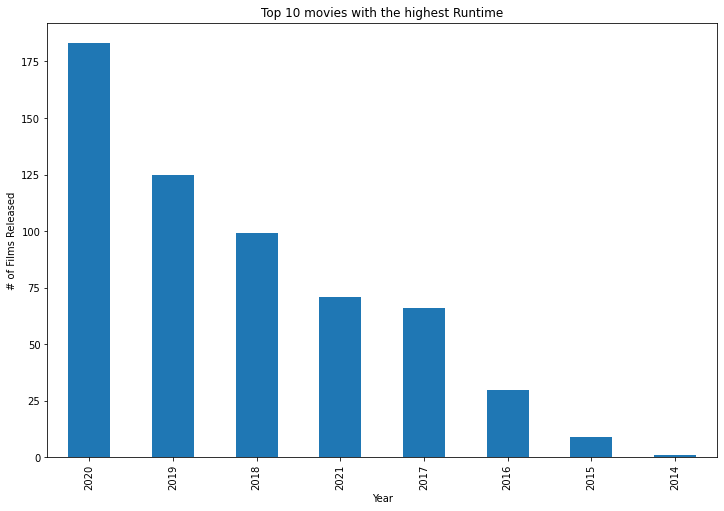

In [16]:
year_of_max_film.plot.bar(figsize=(12,8), title = "Top 10 movies with the highest Runtime", legend=False);
plt.xlabel("Year");
plt.ylabel("# of Films Released");

### 12- Which language movies have the lowest average IMDB rating? Visualize.

In [17]:
min_imdb = df.sort_values(by="IMDB Score", ascending=True)
min_imdb.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,date,P_Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,NaT,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,NaT,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,NaT,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,NaT,2020


In [18]:
min_imdb_language = df.groupby("Language")["IMDB Score"].mean().nsmallest(10)
min_imdb_language.head()

Language
Malay               4.200000
English/Japanese    4.400000
Filipino            5.100000
Norwegian           5.100000
Polish              5.166667
Name: IMDB Score, dtype: float64

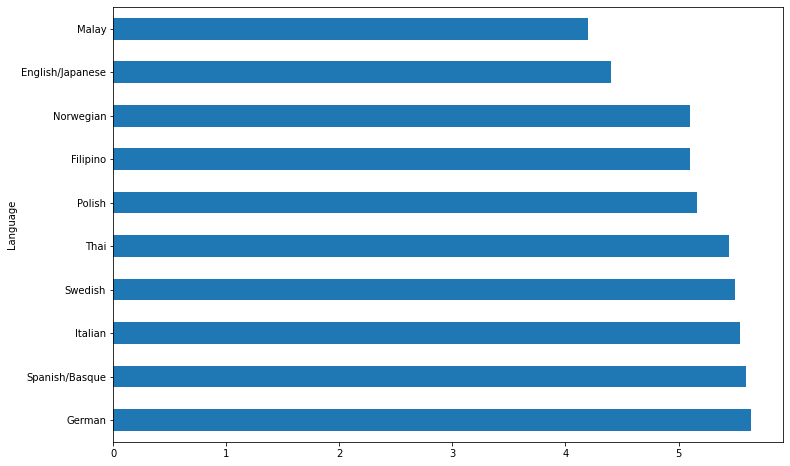

In [19]:
min_imdb_language.sort_values(ascending=False).plot.barh(figsize=(12,8));

### 13-Which year has the greatest total runtime?

In [21]:
max_runtime = df[(df["Runtime"].max()) == df["Runtime"]][["Premiere","Runtime"]] 
print(max_runtime)

              Premiere  Runtime
561  November 27, 2019      209


### 14-What is the "Genre" where each language is used the most?

In [22]:
max_genre = df.groupby(['Genre', 'Language']).agg([len]) 
print(max_genre)

                                                                Title  \
                                                                  len   
Genre                                Language                           
Action                               English                        4   
                                     French                         2   
                                     Hindi                          1   
Action comedy                        English                        4   
                                     Malay                          1   
Action thriller                      English                        1   
Action-adventure                     English/Korean                 1   
Action-thriller                      English                        2   
                                     Indonesian                     1   
Action/Comedy                        English                        1   
Action/Science fiction               English       

### 15-Is there any outlier data in the data set? Please explain.

'\nElimizde bulunan “Runtime” veri setinde sadece numeric olan değişkenleri seçtiğimiz bir dataframe oluşturduk.\n Daha sonra oluşturduğumuz veri seti üzerinden “Runtime” sütununu aşağıdaki şekilde görselleştirdik. \n\n200 ‘e kadar olan çizgide belirli şekiller bulunmaktadır,\n bunlar diğer gözlem kutusuna dahil edilmediğinden yani ortalama verilerinin yakınında hiçbir yerde bulunmadığından aykırı değerlerdir.\n Grafiğe baktığımızda, veri noktalarının çoğunun 50–150 arasında olduğunu söyleyebiliriz,\n ancak en üstlerdeki(160-200) noktalar popülasyondan uzakta olan aykırı noktalardır.\n'

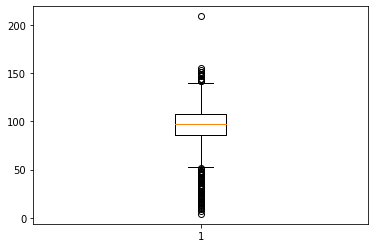

In [23]:
df = df.select_dtypes(include=['float64','int64']) 

df_table = df["Runtime"].copy() 

df['Runtime'] = df['Runtime'].astype('float') 

plt.boxplot(x = df_table)
df.head()

"""
Elimizde bulunan “Runtime” veri setinde sadece numeric olan değişkenleri seçtiğimiz bir dataframe oluşturduk.
 Daha sonra oluşturduğumuz veri seti üzerinden “Runtime” sütununu aşağıdaki şekilde görselleştirdik. 

200 ‘e kadar olan çizgide belirli şekiller bulunmaktadır,
 bunlar diğer gözlem kutusuna dahil edilmediğinden yani ortalama verilerinin yakınında hiçbir yerde bulunmadığından aykırı değerlerdir.
 Grafiğe baktığımızda, veri noktalarının çoğunun 50–150 arasında olduğunu söyleyebiliriz,
 ancak en üstlerdeki(160-200) noktalar popülasyondan uzakta olan aykırı noktalardır.
"""